In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

# From https://janakiev.com/blog/pytorch-iris/, with small edits

In [29]:
# Data import (16A stuff)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data'].astype(np.float32)
y = iris['target'].astype(np.int64)
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 2)

# Convert data to tensors
X_train, X_test, y_train, y_test = torch.Tensor(X_train), torch.Tensor(X_test), torch.Tensor(y_train), torch.Tensor(y_test)

Data = torch.utils.data.TensorDataset(X_train, y_train)

# Tasks:

- Create your model (like our neural network from last time)
- Set your optimizer and loss function
- Write a training loop:
    1. Use the model to make a prediction on the training set
    2. Use .backward() to compute gradients
    3. Use your optimizer to update the model parameters
    4. (optional) Record current loss and testing accuracy for plotting purposes
- Train your model and plot results!

In [7]:
class ffn(nn.Module):
    
  def __init__(self):
      
    super(ffn, self).__init__()
      
    self.fc1 = nn.Linear(4, 250)
      
    self.fc2 = nn.Linear(250, 250)
      
    self.fc3 = nn.Linear(250, 1)
      
  def forward(self,x):

    c1 = F.relu(self.fc1(x))

    c2 = F.relu(self.fc2(c1))
    
    output = self.fc3(c2)
    
    return output

device = "cuda" if torch.cuda.is_available() else "cpu"
model = ffn().to(device = device)

print(model)
print(torch.cuda.is_available())

ffn(
  (fc1): Linear(in_features=4, out_features=250, bias=True)
  (fc2): Linear(in_features=250, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=1, bias=True)
)
False


In [33]:
# We define how to load data from the set for SGD optimization
batch_size = 20

# Random pass
trainloader = torch.utils.data.DataLoader(Data, batch_size = batch_size, shuffle = True)

# mean squared error
loss_function = nn.MSELoss()

# define optimizer with learning rate  1e-3
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

# number of epochs = 500
no_of_epochs = 500

# number of iteration = epochs*(number of data/batch size)
# no_of_iterations = int(no_of_epochs * n / batch_size)

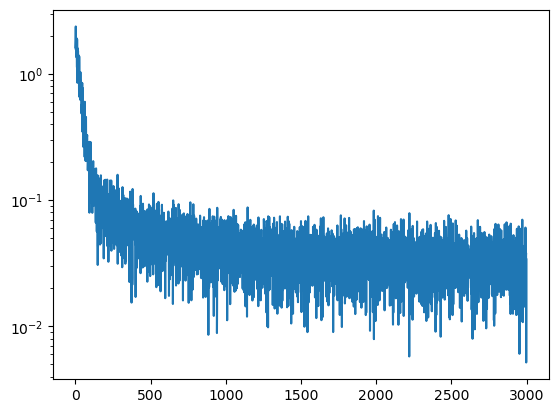

In [34]:
model.train()
losses = []

for epoch in range(no_of_epochs):
  for data, labels in trainloader:
    data = data.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(data)

    outputs = torch.squeeze(outputs)
    loss = loss_function(outputs, labels)
    # record loss at each iteration
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

plt.semilogy(losses)